Przykład implementacji podstawowej sieci GAN (Generative Adversarial Network) w PyTorch do generowania obrazów cyfr.

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision

In [37]:
# Parametry modelu
latent_dim = 100  # Wymiar przestrzeni latentnej (wejście dla generatora)
image_dim = 28 * 28  # Rozmiar obrazów (28x28)
batch_size = 64
num_epochs = 50
lr = 0.0002  # Szybkość uczenia

In [39]:
# Generator
class Generator(nn.Module):
    def __init__(self, latent_dim, image_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, image_dim),
            nn.Tanh()  # Wyjście w zakresie [-1, 1]
        )
    
    def forward(self, z):
        return self.model(z)

# Dyskryminator
class Discriminator(nn.Module):
    def __init__(self, image_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(image_dim, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()  # Wyjście: prawdopodobieństwo
        )
    
    def forward(self, x):
        return self.model(x)

In [41]:
# Przygotowanie danych MNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalizacja do zakresu [-1, 1]
])

dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [43]:
# Inicjalizacja modelu
generator = Generator(latent_dim, image_dim)
discriminator = Discriminator(image_dim)

In [45]:
# Optymalizatory
optimizer_g = optim.Adam(generator.parameters(), lr=lr)
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr)

In [47]:
# Funkcja straty
criterion = nn.BCELoss()

Epoch [1/50] | Loss D: 0.3552 | Loss G: 4.3642
Epoch [2/50] | Loss D: 1.5095 | Loss G: 1.2987
Epoch [3/50] | Loss D: 0.2683 | Loss G: 2.8604
Epoch [4/50] | Loss D: 0.1997 | Loss G: 4.1282
Epoch [5/50] | Loss D: 0.2191 | Loss G: 3.0354
Epoch [6/50] | Loss D: 0.2962 | Loss G: 2.7735
Epoch [7/50] | Loss D: 0.3319 | Loss G: 7.4374
Epoch [8/50] | Loss D: 0.5154 | Loss G: 7.5627
Epoch [9/50] | Loss D: 0.3114 | Loss G: 3.9305
Epoch [10/50] | Loss D: 0.0992 | Loss G: 4.3765


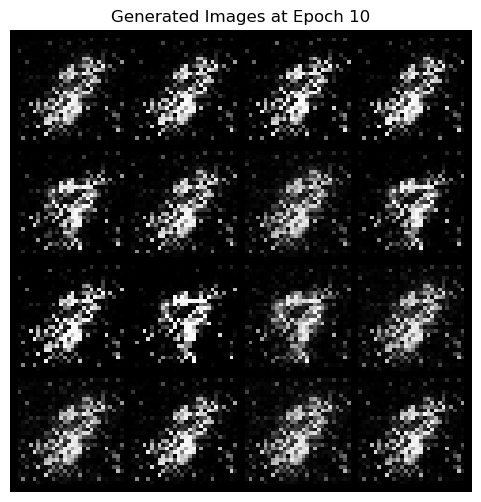

Epoch [11/50] | Loss D: 0.3368 | Loss G: 5.5119
Epoch [12/50] | Loss D: 0.2617 | Loss G: 4.3537
Epoch [13/50] | Loss D: 0.3738 | Loss G: 5.7377
Epoch [14/50] | Loss D: 0.1800 | Loss G: 3.9910
Epoch [15/50] | Loss D: 0.3461 | Loss G: 3.3671
Epoch [16/50] | Loss D: 0.2538 | Loss G: 4.5632
Epoch [17/50] | Loss D: 0.4427 | Loss G: 3.1322
Epoch [18/50] | Loss D: 0.2062 | Loss G: 5.5011
Epoch [19/50] | Loss D: 0.3311 | Loss G: 3.9983
Epoch [20/50] | Loss D: 0.3368 | Loss G: 3.6799


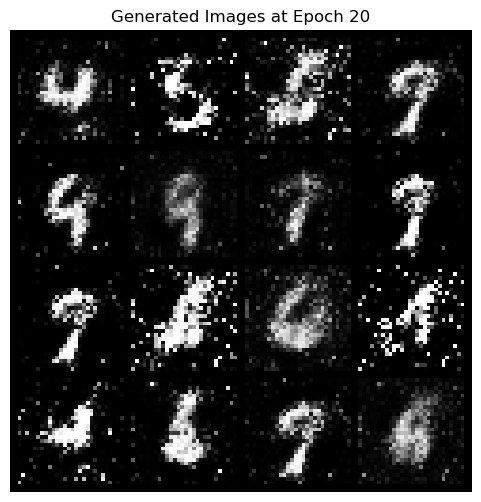

Epoch [21/50] | Loss D: 0.3574 | Loss G: 3.3895
Epoch [22/50] | Loss D: 0.3425 | Loss G: 2.8868
Epoch [23/50] | Loss D: 0.4579 | Loss G: 2.6066
Epoch [24/50] | Loss D: 0.4058 | Loss G: 2.7394
Epoch [25/50] | Loss D: 0.4954 | Loss G: 3.7861
Epoch [26/50] | Loss D: 0.2493 | Loss G: 3.3684
Epoch [27/50] | Loss D: 0.5098 | Loss G: 3.2084
Epoch [28/50] | Loss D: 0.3276 | Loss G: 2.6108
Epoch [29/50] | Loss D: 0.6714 | Loss G: 2.1040
Epoch [30/50] | Loss D: 0.4983 | Loss G: 3.1456


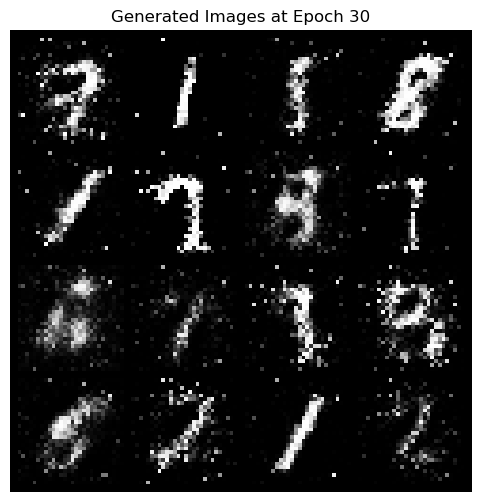

Epoch [31/50] | Loss D: 0.6507 | Loss G: 2.4510
Epoch [32/50] | Loss D: 0.3599 | Loss G: 3.3251
Epoch [33/50] | Loss D: 0.5235 | Loss G: 3.0357
Epoch [34/50] | Loss D: 0.4729 | Loss G: 2.6374
Epoch [35/50] | Loss D: 0.9361 | Loss G: 2.4057
Epoch [36/50] | Loss D: 0.7142 | Loss G: 2.9487
Epoch [37/50] | Loss D: 0.7323 | Loss G: 2.2986
Epoch [38/50] | Loss D: 0.8922 | Loss G: 1.5335
Epoch [39/50] | Loss D: 0.5008 | Loss G: 2.4414
Epoch [40/50] | Loss D: 0.5481 | Loss G: 2.3941


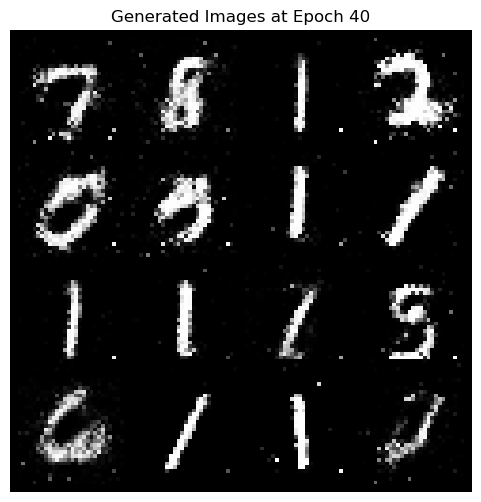

Epoch [41/50] | Loss D: 0.5548 | Loss G: 2.2395
Epoch [42/50] | Loss D: 0.7815 | Loss G: 2.3748
Epoch [43/50] | Loss D: 0.6515 | Loss G: 2.0295
Epoch [44/50] | Loss D: 0.6833 | Loss G: 2.5751
Epoch [45/50] | Loss D: 1.2662 | Loss G: 2.0618
Epoch [46/50] | Loss D: 0.8674 | Loss G: 1.8351
Epoch [47/50] | Loss D: 0.8519 | Loss G: 1.9877
Epoch [48/50] | Loss D: 0.6753 | Loss G: 1.9776
Epoch [49/50] | Loss D: 0.7840 | Loss G: 1.4261
Epoch [50/50] | Loss D: 0.5934 | Loss G: 1.8150


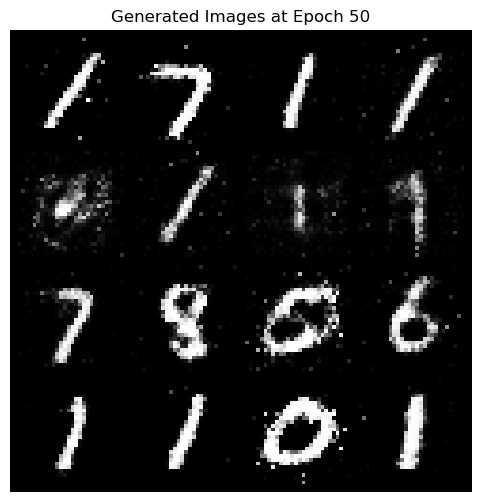

In [49]:
# Trening GAN
for epoch in range(num_epochs):
    for real_images, _ in dataloader:
        # Przetwarzanie rzeczywistych obrazów
        real_images = real_images.view(-1, image_dim).to(torch.float32)
        batch_size = real_images.size(0)
        
        # Generowanie etykiet dla rzeczywistych (1) i fałszywych (0) danych
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)
        
        # Trening dyskryminatora
        optimizer_d.zero_grad()
        outputs_real = discriminator(real_images)
        loss_real = criterion(outputs_real, real_labels)
        
        # Generowanie fałszywych obrazów
        z = torch.randn(batch_size, latent_dim)
        fake_images = generator(z)
        outputs_fake = discriminator(fake_images.detach())
        loss_fake = criterion(outputs_fake, fake_labels)
        
        # Łączny loss dla dyskryminatora
        loss_d = loss_real + loss_fake
        loss_d.backward()
        optimizer_d.step()
        
        # Trening generatora
        optimizer_g.zero_grad()
        outputs_fake = discriminator(fake_images)
        loss_g = criterion(outputs_fake, real_labels)  # Generator próbuje oszukać dyskryminator
        loss_g.backward()
        optimizer_g.step()
    
    # Wyświetlenie postępów
    print(f"Epoch [{epoch+1}/{num_epochs}] | Loss D: {loss_d.item():.4f} | Loss G: {loss_g.item():.4f}")

    # Generowanie obrazów co kilka epok
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            z = torch.randn(16, latent_dim)
            generated_images = generator(z).view(-1, 1, 28, 28)
            grid = torchvision.utils.make_grid(generated_images, nrow=4, normalize=True)
            plt.figure(figsize=(6, 6))
            plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
            plt.title(f"Generated Images at Epoch {epoch+1}")
            plt.axis('off')
            plt.show()